## Machine Learning to Predict Titanic Survivors

## 첫번째 캐글 필사
- 캐글 필사 : https://www.kaggle.com/samsonqian/titanic-guide-with-sklearn-and-eda

### 1. Library와 Package 불러오기

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import os
print(os.listdir("../../../data/titanic"))

['test.csv', 'train.csv', 'gender_submission.csv']


### 2. Data Set 탐색

In [2]:
training = pd.read_csv("../../../data/titanic/train.csv")
testing = pd.read_csv("../../../data/titanic/test.csv")

In [3]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# 데이터 셋의 key 값 추출
print(training.keys())
print(testing.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
types_train = training.dtypes
num_values = types_train[(types_train == float)]

print("These are the numerical features: ")
print(num_values)

These are the numerical features: 
Age     float64
Fare    float64
dtype: object


In [7]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Describe()를 통해 얻게 된 것은 모든 변수들이 숫자로 표현이 되어 있지만 변수의 숫자 값이 실질적인 값을 가지는 변수는 Age와 Fare 일 뿐이다. 다른 변수들은 단지 숫자로 표현되어 있을 뿐이다

### 3. NaN 값 다루기
- NaN 값 같은 경우 실제 데이터의 모델 생성과정에서 포함이 되어 오류를 발생시킨다. NaN 값을 다루는데 있어 다양한 방법들이 존재함
- 방법들은 이번 발표에서 다룰 예정: https://rfriend.tistory.com/262

In [8]:
def null_table(training, testing):
    print("Training Data Frame")
    print(pd.isnull(training).sum())
    print(" ")
    print("Testing Data Frame")
    print(pd.isnull(testing).sum())

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


- 그 결과 Cabin과 Age 쪽에서 많은 수의 결측 값들이 존재함을 알 수 있었음
- 또한, Ticket 변수 같은 경우에는 필요 없는 것이기 때문에 Cabin과 Ticket 변수를 제거

In [9]:
training.drop(labels = ["Ticket", "Cabin"], axis = 1, inplace = True)
testing.drop(labels = ["Ticket", "Cabin"], axis = 1, inplace = True)

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


In [10]:
# 오류가 나서 확인 해본 결과 이미 Ticket과 Cabin 변수가 존재하지 않았기에 실행이 안된 것이다.
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [11]:
null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


<AxesSubplot:xlabel='Age', ylabel='Density'>

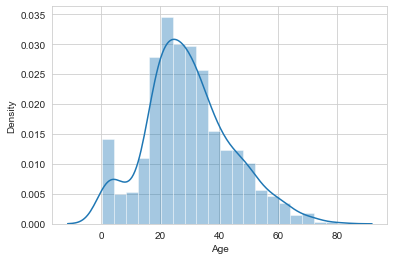

In [12]:
# copy 함수 같은 경우 파이썬 고유의 함수로 객체를 복사해서 옮기는 함수를 의미
copy = training.copy()
# nan 값을 없앰
copy.dropna(inplace = True)
# seaborn에서 distplot는 히스토그램과 커널 밀도 곡선을 나타내주는 함수를 의미
sns.distplot(copy["Age"])

- 비대칭도가 나타내는 의미 : https://ko.wikipedia.org/wiki/%EB%B9%84%EB%8C%80%EC%B9%AD%EB%8F%84
- 그래프를 볼 때 오른쪽 부분에 긴 꼬리를 가지며 자료가 왼쪽에 더 많이 분포해 있다는 것을 알 수 있음 단순히 age를 평균값으로 대체하는 것은 왜곡을 심화 시킬 수 있기 때문에 중간 값으로 대체하는 것이 더 왜곡 심화를 줄일 수 있을 것이다.

In [13]:
training["Age"].fillna(training["Age"].median(), inplace = True)
testing["Age"].fillna(testing["Age"].median(), inplace = True)
training["Embarked"].fillna("S", inplace = True)
testing["Fare"].fillna(testing["Fare"].median(), inplace = True)

null_table(training, testing)

Training Data Frame
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
 
Testing Data Frame
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [14]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [15]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [16]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


### 4. Data 시각화

#### Gender

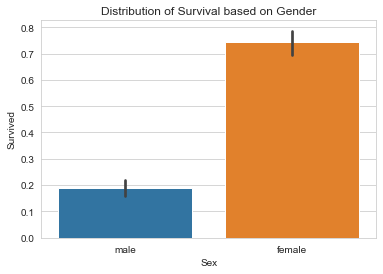

Total people survived is: 342
Proportion of Females who survived:
0.6812865497076024
Proportion of Males who survived:
0.31871345029239767


In [17]:
# seaborn에서 barplot은 막대 그래프의 평균치를 이용해 그려줌
sns.barplot(x="Sex", y="Survived", data=training)
plt.title("Distribution of Survival based on Gender")
plt.show()

total_survived_females = training[training.Sex == "female"]["Survived"].sum()
total_survived_males = training[training.Sex == "male"]["Survived"].sum()

print("Total people survived is: " + str((total_survived_females + total_survived_males)))
print("Proportion of Females who survived:")
print(total_survived_females/(total_survived_females + total_survived_males))
print("Proportion of Males who survived:")
print(total_survived_males/(total_survived_females + total_survived_males))

#### Class

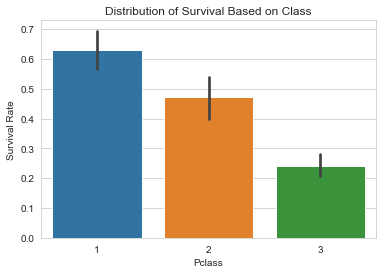

Total people survived is: 342
Proportion of Class 1 Passengers who survived:
0.39766081871345027
Proportion of Class 2 Passengers who survived:
0.2543859649122807
Proportion of Class 3 Passengers who survived:
0.347953216374269


In [18]:
sns.barplot(x="Pclass", y="Survived", data=training)
plt.ylabel("Survival Rate")
plt.title("Distribution of Survival Based on Class")
plt.show()

total_survived_one = training[training.Pclass == 1]["Survived"].sum()
total_survived_two = training[training.Pclass == 2]["Survived"].sum()
total_survived_three = training[training.Pclass == 3]["Survived"].sum()
total_survived_class = total_survived_one + total_survived_two + total_survived_three

print("Total people survived is: " + str(total_survived_class))
print("Proportion of Class 1 Passengers who survived:")
print(total_survived_one/total_survived_class)
print("Proportion of Class 2 Passengers who survived:")
print(total_survived_two/total_survived_class)
print("Proportion of Class 3 Passengers who survived:")
print(total_survived_three/total_survived_class)

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

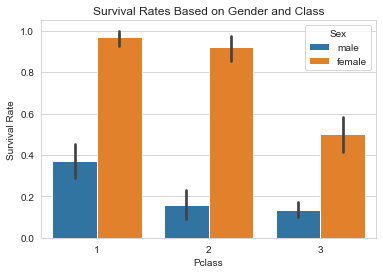

In [19]:
# hue는 여러 열에서 집단을 묶어서 시각화하는 요소로 hue="Sex"면 성별로 묶어 세부집단을 시각화하는 것임
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

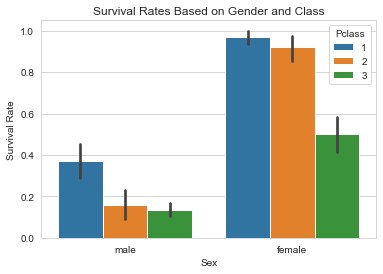

In [20]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

- 그 결과 Pclass에 존재했던 승객들이 생존할 확률이 더 높음을 알 수 있다.

#### Age

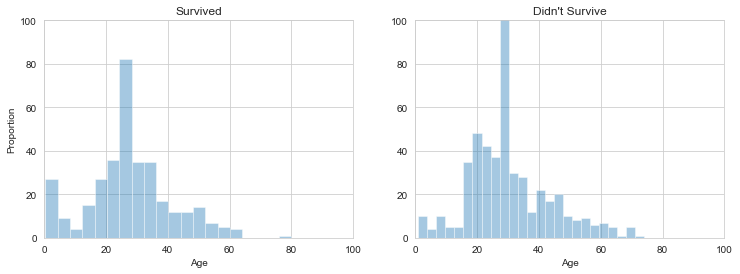

In [21]:
survived_ages = training[training.Survived == 1]["Age"]
not_survived_ages = training[training.Survived == 0]["Age"]
# 첫번째 줄에 2개 중 첫번째
plt.subplot(1, 2, 1)
sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Survived")
plt.ylabel("Proportion")
# 첫번째 줄에 2개 중 두번째
plt.subplot(1, 2, 2)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Didn't Survive")
plt.subplots_adjust(right=1.7)
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='Age'>

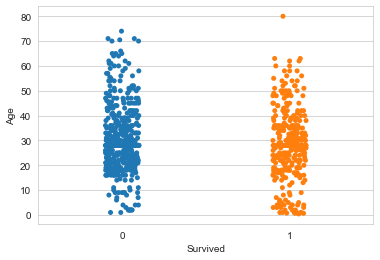

In [22]:
sns.stripplot(x="Survived", y="Age", data=training, jitter=True)

- 젊은 사람들이 더 생존할 확률이 높음

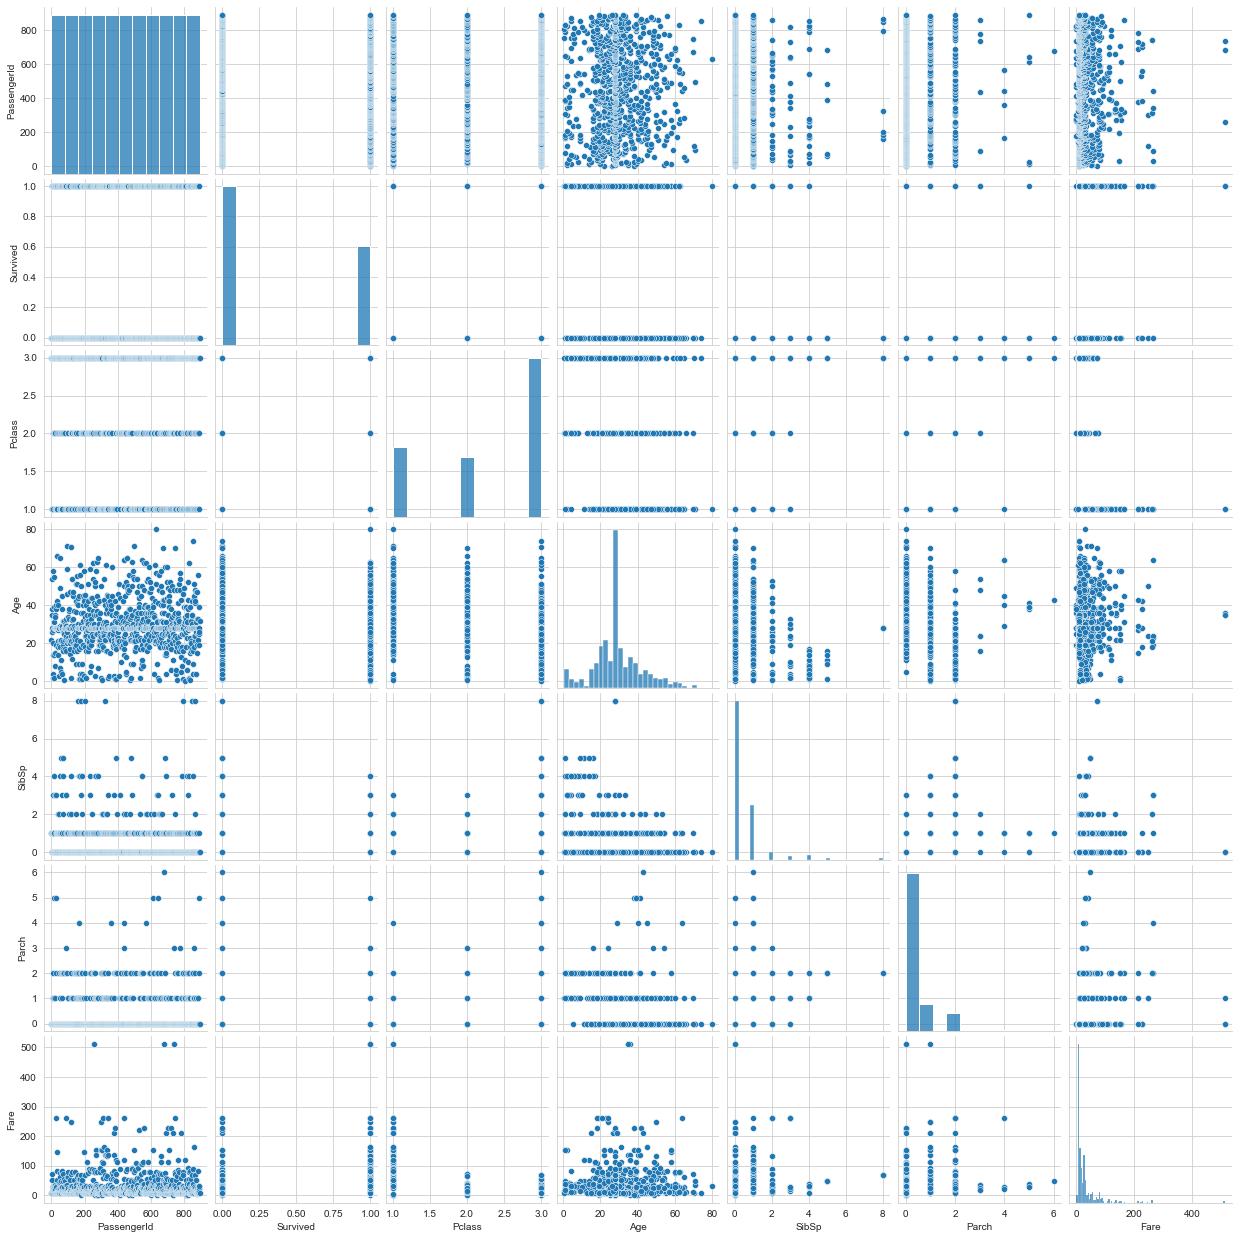

In [23]:
sns.pairplot(training)

### 5. 특징 가공

In [24]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,28.0,0,0,79.2000,C
600,601,1,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,27.0000,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,69.5500,S
816,817,0,3,"Heininen, Miss. Wendla Maria",female,23.0,0,0,7.9250,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,247.5208,C


In [25]:
testing.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
156,1048,1,"Bird, Miss. Ellen",female,29.0,0,0,221.7792,S
312,1204,3,"Sadowitz, Mr. Harry",male,27.0,0,0,7.5750,S
58,950,3,"Davison, Mr. Thomas Henry",male,27.0,1,0,16.1000,S
356,1248,1,"Brown, Mrs. John Murray (Caroline Lane Lamson)",female,59.0,2,0,51.4792,S
117,1009,3,"Sandstrom, Miss. Beatrice Irene",female,1.0,1,1,16.7000,S


- 성별은 0과 1로 나누고 Embarked 는 S, C, Q 순으로 0, 1, 2로 대체

In [26]:
set(training["Embarked"])

{'C', 'Q', 'S'}

In [27]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_sex.fit(training["Sex"])

encoded_sex_training = le_sex.transform(training["Sex"])
training["Sex"] = encoded_sex_training
encoded_sex_testing = le_sex.transform(testing["Sex"])
testing["Sex"] = encoded_sex_testing

le_embarked = LabelEncoder()
le_embarked.fit(training["Embarked"])

encoded_embarked_training = le_embarked.transform(training["Embarked"])
training["Embarked"] = encoded_embarked_training
encoded_embarked_testing = le_embarked.transform(testing["Embarked"])
testing["Embarked"] = encoded_embarked_testing

In [28]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,28.0,1,0,146.5208,0
222,223,0,3,"Green, Mr. George Henry",1,51.0,0,0,8.0500,2
250,251,0,3,"Reed, Mr. James George",1,28.0,0,0,7.2500,2
637,638,0,2,"Collyer, Mr. Harvey",1,31.0,1,1,26.2500,2
478,479,0,3,"Karlsson, Mr. Nils August",1,22.0,0,0,7.5208,2


In [29]:
testing.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
351,1243,2,"Stokes, Mr. Philip Joseph",1,25.0,0,0,10.5000,2
204,1096,2,"Andrew, Mr. Frank Thomas",1,25.0,0,0,10.5000,2
229,1121,2,"Hocking, Mr. Samuel James Metcalfe",1,36.0,0,0,13.0000,2
183,1075,3,"Lane, Mr. Patrick",1,27.0,0,0,7.7500,1
56,948,3,"Cor, Mr. Bartol",1,35.0,0,0,7.8958,2


#### Creating Synthetic Features

In [30]:
training["FamSize"] = training["SibSp"] + training["Parch"] + 1
testing["FamSize"] = testing["SibSp"] + testing["Parch"] + 1

In [31]:
training["IsAlone"] = training.FamSize.apply(lambda x: 1 if x == 1 else 0)
testing["IsAlone"] = testing.FamSize.apply(lambda x: 1 if x == 1 else 0)

In [32]:
for name in training["Name"]:
    training["Title"] = training["Name"].str.extract("([A-Za-z]+)\.", expand = True)

for name in testing["Name"]:
    testing["Title"] = testing["Name"].str.extract("([A-Za-z]+)\.", expand = True)

In [33]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,1,1,Mr


In [34]:
titles = set(training["Title"])
print(titles)

{'Miss', 'Dr', 'Mlle', 'Col', 'Major', 'Mme', 'Master', 'Lady', 'Capt', 'Sir', 'Jonkheer', 'Ms', 'Mr', 'Don', 'Rev', 'Mrs', 'Countess'}


In [35]:
title_list = list(training["Title"])
frequency_titles = []

for i in titles:
    frequency_titles.append(title_list.count(i))
    
print(frequency_titles)

[182, 7, 2, 2, 2, 1, 40, 1, 1, 1, 1, 1, 517, 1, 6, 125, 1]


In [36]:
titles = list(titles)

title_dataframe = pd.DataFrame({
    "Titles" : titles,
    "Frequency" : frequency_titles
})

print(title_dataframe)

      Titles  Frequency
0       Miss        182
1         Dr          7
2       Mlle          2
3        Col          2
4      Major          2
5        Mme          1
6     Master         40
7       Lady          1
8       Capt          1
9        Sir          1
10  Jonkheer          1
11        Ms          1
12        Mr        517
13       Don          1
14       Rev          6
15       Mrs        125
16  Countess          1


In [37]:
title_replacements = {"Mlle": "Other", "Major": "Other", "Col": "Other", "Sir": "Other", "Don": "Other", "Mme": "Other",
          "Jonkheer": "Other", "Lady": "Other", "Capt": "Other", "Countess": "Other", "Ms": "Other", "Dona": "Other"}

training.replace({"Title": title_replacements}, inplace=True)
testing.replace({"Title": title_replacements}, inplace=True)

le_title = LabelEncoder()
le_title.fit(training["Title"])

encoded_title_training = le_title.transform(training["Title"])
training["Title"] = encoded_title_training
encoded_title_testing = le_title.transform(testing["Title"])
testing["Title"] = encoded_title_testing

In [38]:
training.drop("Name", axis = 1, inplace = True)
testing.drop("Name", axis = 1, inplace = True)

In [39]:
training.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
744,745,1,3,1,31.0,0,0,7.9250,2,1,1,3
591,592,1,1,0,52.0,1,0,78.2667,0,2,0,4
428,429,0,3,1,28.0,0,0,7.7500,1,1,1,3
268,269,1,1,0,58.0,0,1,153.4625,2,2,0,4
243,244,0,3,1,22.0,0,0,7.1250,2,1,1,3


In [40]:
testing.sample(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
213,1105,2,0,60.0,1,0,26.000,2,2,0,4
206,1098,3,0,35.0,0,0,7.750,1,1,1,2
386,1278,3,1,24.0,0,0,7.775,2,1,1,3
204,1096,2,1,25.0,0,0,10.500,2,1,1,3
127,1019,3,0,27.0,2,0,23.250,1,3,0,2


### 6. 특징 Rescaling
- 특징 변수의 크기를 조절하는 거는 실제 모델이 굴러감에 있어 컴퓨팅 능력의 과부하를 방지하기 위한 것이고 이를 통해 더 높은 정확성을 도출할 수 있다.

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

ages_train = np.array(training["Age"]).reshape(-1, 1)
fares_train = np.array(training["Fare"]).reshape(-1, 1)
ages_test = np.array(testing["Age"]).reshape(-1, 1)
fares_test = np.array(testing["Fare"]).reshape(-1, 1)

training["Age"] = scaler.fit_transform(ages_train)
training["Fare"] = scaler.fit_transform(fares_train)
testing["Age"] = scaler.fit_transform(ages_test)
testing["Fare"] = scaler.fit_transform(fares_test)

In [42]:
training.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
0,1,0,3,1,-0.565736,1,0,-0.502445,2,2,0,3
1,2,1,1,0,0.663861,1,0,0.786845,0,2,0,4
2,3,1,3,0,-0.258337,0,0,-0.488854,2,1,1,2
3,4,1,1,0,0.433312,1,0,0.420730,2,2,0,4
4,5,0,3,1,0.433312,0,0,-0.486337,2,1,1,3


In [43]:
testing.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
0,892,3,1,0.386231,0,0,-0.497413,1,1,1,3
1,893,3,0,1.371370,1,0,-0.512278,2,2,0,4
2,894,2,1,2.553537,0,0,-0.464100,1,1,1,3
3,895,3,1,-0.204852,0,0,-0.482475,2,1,1,3
4,896,3,0,-0.598908,1,1,-0.417492,2,3,0,4


### 7. Model 적합과 예측

#### sklearn Models to Test

In [44]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [45]:
from sklearn.metrics import make_scorer, accuracy_score

In [46]:
from sklearn.model_selection import GridSearchCV

#### Defining Features in Training/Test Set

In [47]:
X_train = training.drop(labels=["PassengerId", "Survived"], axis=1)
y_train = training["Survived"]
X_test = testing.drop("PassengerId", axis=1)

In [48]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
0,3,1,-0.565736,1,0,-0.502445,2,2,0,3
1,1,0,0.663861,1,0,0.786845,0,2,0,4
2,3,0,-0.258337,0,0,-0.488854,2,1,1,2
3,1,0,0.433312,1,0,0.420730,2,2,0,4
4,3,1,0.433312,0,0,-0.486337,2,1,1,3


In [49]:
from sklearn.model_selection import train_test_split

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

#### SVC Model

In [50]:
svc_clf = SVC()

parameters_svc = {"kernel": ["rbf", "linear"], "probability": [True, False], "verbose": [True, False]}
grid_svc = GridSearchCV(svc_clf, parameters_svc, scoring=make_scorer(accuracy_score))
grid_svc.fit(X_training, y_training)

svc_clf = grid_svc.best_estimator_

svc_clf.fit(X_training, y_training)
pred_svc = svc_clf.predict(X_valid)
acc_svc = accuracy_score(y_valid, pred_svc)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [51]:
print("The Score for SVC is: " + str(acc_svc))

The Score for SVC is: 0.8212290502793296


#### LinearSVC Model

In [52]:
linsvc_clf = LinearSVC()

parameters_linsvc = {"multi_class": ["ovr", "crammer_singer"], "fit_intercept": [True, False], "max_iter": [100, 500, 1000, 1500]}

grid_linsvc = GridSearchCV(linsvc_clf, parameters_linsvc, scoring=make_scorer(accuracy_score))
grid_linsvc.fit(X_training, y_training)

linsvc_clf = grid_linsvc.best_estimator_

linsvc_clf.fit(X_training, y_training)
pred_linsvc = linsvc_clf.predict(X_valid)
acc_linsvc = accuracy_score(y_valid, pred_linsvc)

print("The Score for LinearSVC is : " + str(acc_linsvc))

The Score for LinearSVC is : 0.7932960893854749


#### RandomForest Model

In [54]:
rf_clf = RandomForestClassifier()

parameters_rf = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], "criterion": ["gini", "entropy"], "max_features": ["auto", "sqrt", "log2"], 
                 "max_depth": [2, 3, 5, 10], "min_samples_split": [2, 3, 5, 10]}

grid_rf = GridSearchCV(rf_clf, parameters_rf, scoring=make_scorer(accuracy_score))
grid_rf.fit(X_training, y_training)

rf_clf = grid_rf.best_estimator_

rf_clf.fit(X_training, y_training)
pred_rf = rf_clf.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)

print("The Score for Random Forest is: " + str(acc_rf))

The Score for Random Forest is: 0.7932960893854749


#### LogisticRegressiong Model

In [55]:
logref_clf = LogisticRegression()

parameters_logreg = {"penalty": ["l2"], "fit_intercept": [True, False], "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"], "max_iter": [50, 100, 200], "warm_start": [True, False]}

grid_logreg = GridSearchCV(logref_clf, parameters_logreg, scoring=make_scorer(accuracy_score))
grid_logreg.fit(X_training, y_training)

logreg_clf = grid_logreg.best_estimator_
pred_logreg = logreg_clf.predict(X_valid)
acc_logreg = accuracy_score(y_valid, pred_logreg)

print("The Score for Logistic Regression is: " + str(acc_logreg))

The Score for Logistic Regression is: 0.7988826815642458


#### KNeighbors Model

In [56]:
knn_clf = KNeighborsClassifier()

parameters_knn = {"n_neighbors": [3, 5, 10, 15], "weights": ["uniform", "distance"], "algorithm": ["auto", "ball_tree", "kd_tree"], "leaf_size": [20, 30, 50]}

grid_knn = GridSearchCV(knn_clf, parameters_knn, scoring=make_scorer(accuracy_score))
grid_knn.fit(X_training, y_training)

knn_clf = grid_knn.best_estimator_

knn_clf.fit(X_training, y_training)
pred_knn = knn_clf.predict(X_valid)
acc_knn = accuracy_score(y_valid, pred_knn)
print("The Score for KNeighbors is: " + str(acc_knn))

The Score for KNeighbors is: 0.7653631284916201


#### GaussianNB Model

In [57]:
gnb_clf = GaussianNB()

parameters_gnb = {}

grid_gnb = GridSearchCV(gnb_clf, parameters_gnb, scoring=make_scorer(accuracy_score))
grid_gnb.fit(X_training, y_training)

gnb_clf = grid_gnb.best_estimator_

gnb_clf.fit(X_training, y_training)
pred_gnb = gnb_clf.predict(X_valid)
acc_gnb = accuracy_score(y_valid, pred_gnb)

print("The Score for Gaussian NB is: " + str(acc_gnb))

The Score for Gaussian NB is: 0.776536312849162


#### DecisionTree Model

In [58]:
dt_clf = DecisionTreeClassifier()

parameters_dt = {"criterion": ["gini", "entropy"], "splitter": ["best", "random"], "max_features": ["auto", "sqrt", "log2"]}

# 왜 계속 GridSearchCV 함수를 쓰는거지?
grid_dt = GridSearchCV(dt_clf, parameters_dt, scoring=make_scorer(accuracy_score))
grid_dt.fit(X_training, y_training)

dt_clf = grid_dt.best_estimator_

dt_clf.fit(X_training, y_training)
pred_dt = dt_clf.predict(X_valid)
acc_dt = accuracy_score(y_valid, pred_dt)

print("The Score for Decision Tree is: " + str(acc_dt))

The Score for Decision Tree is: 0.7932960893854749


#### XGBoost Model

In [60]:
from xgboost import XGBClassifier

xg_clf = XGBClassifier()

parameters_xg = {"objective" : ["reg:linear"], "n_estimators" : [5, 10, 15, 20]}

grid_xg = GridSearchCV(xg_clf, parameters_xg, scoring=make_scorer(accuracy_score))
grid_xg.fit(X_training, y_training)

xg_clf = grid_xg.best_estimator_

xg_clf.fit(X_training, y_training)
pred_xg = xg_clf.predict(X_valid)
acc_xg = accuracy_score(y_valid, pred_xg)

print("The Score for XGBoost is: " + str(acc_xg))

[22:28:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:28:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:28:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:28:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:28:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:28:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/objective/regression_obj

#### 8. 모델 성능 평가

In [62]:
model_performance = pd.DataFrame({
    "Model": ["SVC", "Linear SVC", "Random Forest", 
              "Logistic Regression", "K Nearest Neighbors", "Gaussian Naive Bayes",  
              "Decision Tree", "XGBClassifier"],
    "Accuracy": [acc_svc, acc_linsvc, acc_rf, 
              acc_logreg, acc_knn, acc_gnb, acc_dt, acc_xg]
})

model_performance.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
7,XGBClassifier,0.843575
0,SVC,0.821229
3,Logistic Regression,0.798883
1,Linear SVC,0.793296
2,Random Forest,0.793296
6,Decision Tree,0.793296
5,Gaussian Naive Bayes,0.776536
4,K Nearest Neighbors,0.765363


#### 9. 최종 제출

In [63]:
svc_clf.fit(X_train, y_train)

[LibSVM]

SVC(probability=True, verbose=True)

In [64]:
submission_predictions = svc_clf.predict(X_test)

In [65]:
submission = pd.DataFrame({
    "PassengerId": testing["PassengerId"],
    "Survived": submission_predictions
})

submission.to_csv("titanic.csv", index=False)
print(submission.shape)

(418, 2)


## 2번째 캐글 필사
- 캐글 필사: https://www.kaggle.com/datafan07/titanic-eda-and-several-modelling-approaches

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator

from scipy import interp
import math
from scipy.stats import norm
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 50
plt.style.use('ggplot')

In [2]:
v_train = pd.read_csv("../../../data/titanic/train.csv")
v_test = pd.read_csv("../../../data/titanic/test.csv")

idx = len(v_train)

In [3]:
# head()나 tail()을 사용하는 것이 아닌 display 를 사용함 
display(v_train.sample(3))
display(v_test.sample(3))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
370,371,1,1,"Harder, Mr. George Achilles",male,25.0,1,0,11765,55.4417,E50,C
734,735,0,2,"Troupiansky, Mr. Moses Aaron",male,23.0,0,0,233639,13.0000,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
54,946,2,"Mangiavacchi, Mr. Serafino Emilio",male,NaN,0,0,SC/A.3 2861,15.5792,NaN,C
373,1265,2,"Harbeck, Mr. William H",male,44.0,0,0,248746,13.0000,NaN,S


In [4]:
v_train.drop('PassengerId', axis = 1, inplace = True)
v_test.drop('PassengerId', axis = 1, inplace = True)
v_merged = pd.concat([v_train, v_test], sort = False).reset_index(drop = True)

In [5]:
display(v_merged.shape)

(1309, 11)

In [6]:
display(v_merged.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
display(v_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 112.6+ KB


None

### 데이터 탐색

#### Categorical Features(분류 속성)
- Survived: 생존 1 아니면 0
- Pclass: 1이 첫번째, 2가 두번째, 3이 세번째
- Sex: 승객으이 성별
- SipSp: 배에 탄 형제 자매/배우자를 나타냄
- Parch: 배에 있는 부모 자녀의 수
- Embarked: 승객이 출발 한 곳의 깃발, C는 Cherbourg, Q는 Queenstown, S는 Southampton

In [14]:
cats = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

def plotFrequency(cats):
    fig, axes = plt.subplots(math.ceil(len(cats) / 3), 3, figsize=(20, 12))
    axes = axes.flatten()

    for ax, cat in zip(axes, cats):
        if cat == 'Survived':
            total = float(len(v_train[cat]))
        else:
            total = float(len(v_merged[cat]))
        sns.countplot(v_merged[cat], palette='plasma', ax=ax)

        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2.,
                    height + 10,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha="center")

        plt.ylabel('Count', fontsize=15, weight='bold')

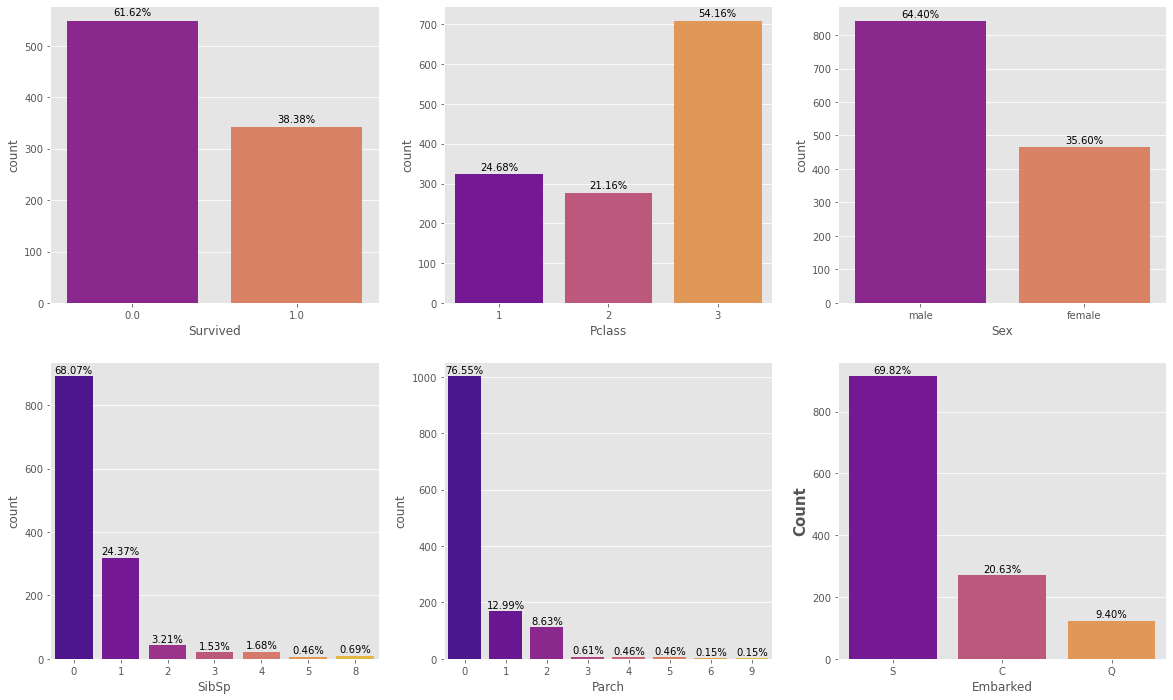

In [15]:
plotFrequency(cats)

In [16]:
# seaborn countplot은 Categorical 각각의 숫자를 세준다.
def plotsurvival(cats, data):
    fig, axes = plt.subplots(math.ceil(len(cats)/3), 3, figsize=(20, 12))
    
    axes = axes.flatten()
    
    for ax, cat in zip(axes, cats):
        if cat == 'Survived':
            sns.countplot(v_train[cat], palette='plasma', ax=ax)
            
        else:
            sns.countplot(x=cat,
                         data=data,
                         hue='Survived',
                         palette='plasma',
                         ax=ax)
            ax.legend(title='Survived?',
                     loc='upper right',
                     labels=['No', 'Yes'])
            
        plt.ylabel('Count', fontsize=15, weight='bold')

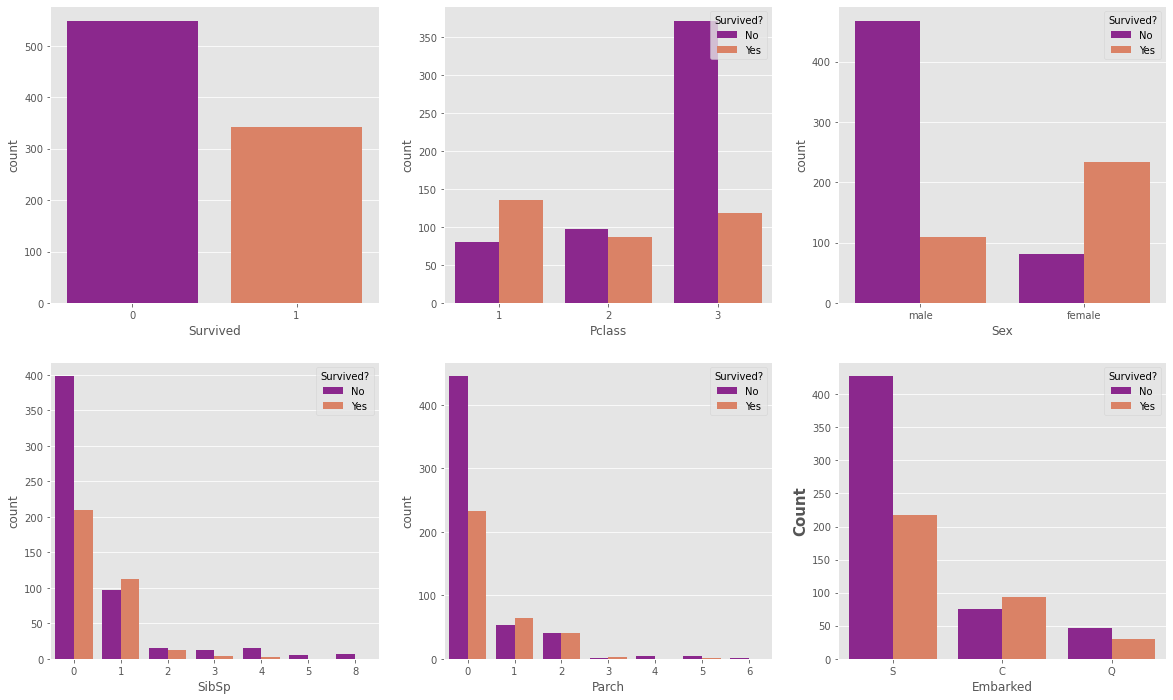

In [17]:
plotsurvival(cats, v_train)

#### Numerical Features

- Age: 승객의 나이를 명백하게 알려줌
- Fare: 티켓 구매 가격

In [22]:
def plot_3chart(df, feature):
    # gridspec은 말 그대로 그래프의 위치를 정해줌 마치 display: grid라는 프론트와 비슷 : https://matplotlib.org/3.3.3/tutorials/intermediate/gridspec.html
    import matplotlib.gridspec as gridspec
    from matplotlib.ticker import MaxNLocator
    
    
    fig = plt.figure(constrained_layout=True, figsize=(12, 8))
    
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    
    ax1 = fig.add_subplot(grid[0, :2])
    
    ax1.set_title('Histogram')
    
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 fit=norm,
                 ax=ax1,
                 color='#e74c3c')
    ax1.legend(labels=['Normal', 'Actual'])

    ax2 = fig.add_subplot(grid[1, :2])
    
    ax2.set_title('Probability Plot')
    
    stats.probplot(df.loc[:, feature].fillna(np.mean(df.loc[:, feature])),
                   plot=ax2)
    ax2.get_lines()[0].set_markerfacecolor('#e74c3c')
    ax2.get_lines()[0].set_markersize(12.0)

    ax3 = fig.add_subplot(grid[:, 2])
    
    ax3.set_title('Box Plot')
    
    sns.boxplot(df.loc[:, feature], orient='v', ax=ax3, color='#e74c3c')
    ax3.yaxis.set_major_locator(MaxNLocator(nbins=24))

    plt.suptitle(f'{feature}', fontsize=24)

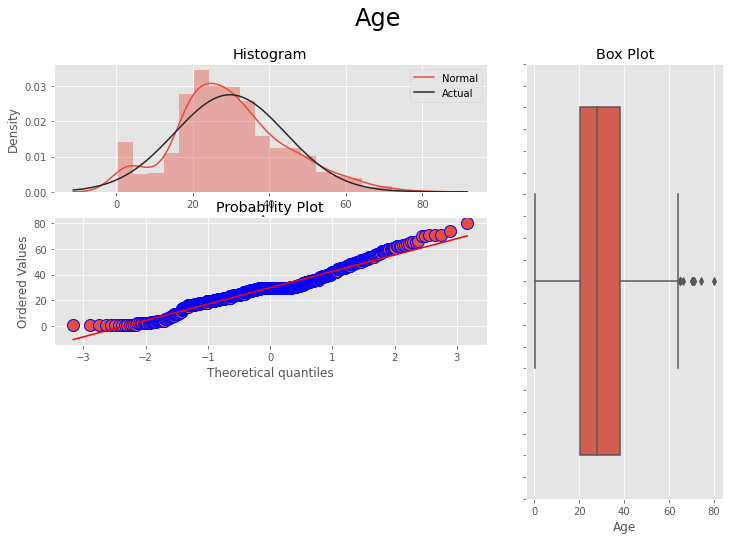

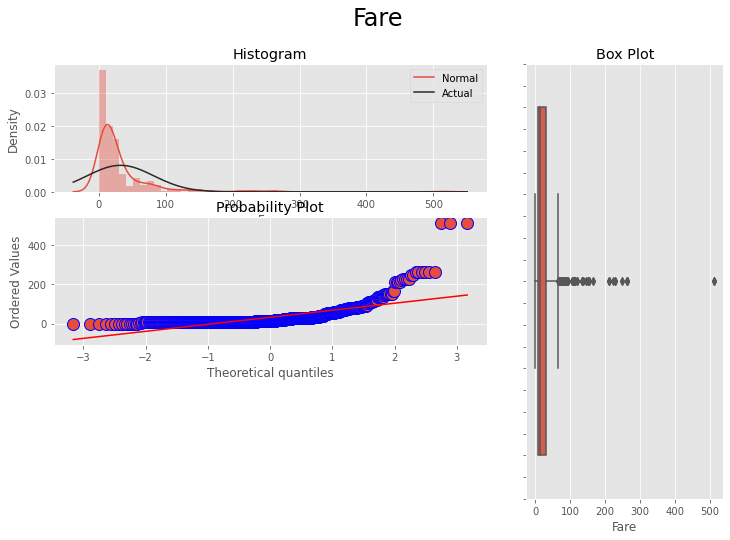

In [23]:
plot_3chart(v_train, 'Age')
plot_3chart(v_train, 'Fare')

- fare과 age는 크게 survival과 선형적 관계를 이루고 있지 않음

In [24]:
train_corr = v_train[['Survived', 'Age', 'Fare'
                      ]].corr(method='spearman').abs().unstack().sort_values(
                          kind='quicksort', ascending=False).reset_index()
train_corr.rename(columns={
    'level_0': 'Feature A',
    'level_1': 'Feature B',
    0: 'Correlation Coefficient'
},inplace=True)

train_corr[(train_corr['Feature A'] == 'Survived')].style.background_gradient(
    cmap='summer_r')

,Feature A,Feature B,Correlation Coefficient
2,Survived,Survived,1.000000
4,Survived,Fare,0.323736
8,Survived,Age,0.052565


#### Missing Values

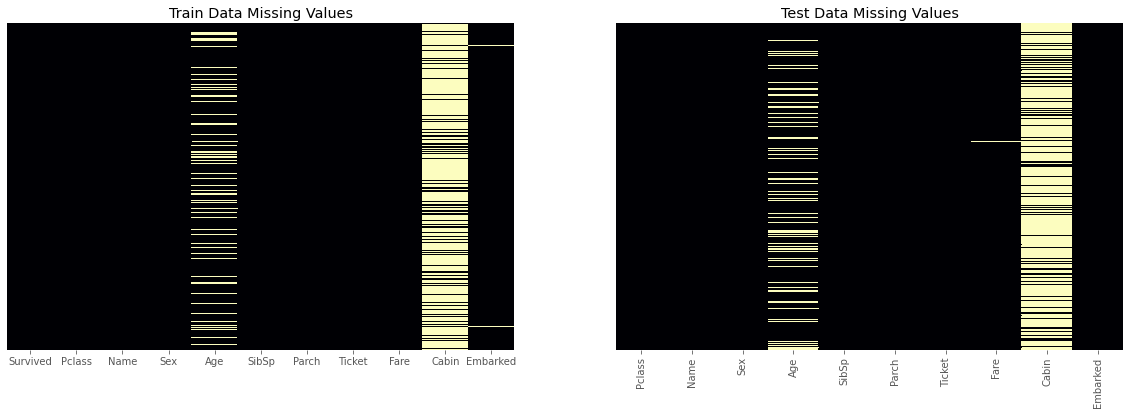

In [26]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 6))
sns.heatmap(v_train.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='magma',
            ax=ax[0])
sns.heatmap(v_test.isnull(),
           yticklabels = False,
           cbar = False,
           cmap='magma',
           ax=ax[1])

ax[0].set_title('Train Data Missing Values')
ax[1].set_title('Test Data Missing Values')

plt.xticks(rotation=90)
plt.show()

### Building the Feature Engineering Machine

In [27]:
def status(feature):
    print('Processing', feature, ': DONE')
    print(f'Shape after processing {combined.shape}')
    print('*' * 40)

#### Data Merger

In [28]:
def get_combined_data():
    train = pd.read_csv("../../../data/titanic/train.csv")
    test = pd.read_csv("../../../data/titanic/test.csv")
    
    targets = train.Survived
    
    combined = train.append(test)
    combined.reset_index(inplace=True, drop=True)
    
    return combined

#### Family Assembler
- Parch, SibSp를 하나의 가족으로 묶음

In [29]:
def process_family():
    global combined
    
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    combined['Alone'] = combined['FamilySize'].map(lambda s:1 if s == 1 else 0)
    
    status('Family')
    return combined

#### Family Survival Detector
- 가족 정보는 이름, 요금, 티켓 번호를 내포함

In [52]:
def family_survival():
    global combined
    
    combined['Last_Name'] = combined['Name'].apply(lambda x: str.split(x, ",")[0])
    default_survival_rate = 0.5
    combined['Family_Survival'] = default_survival_rate
    
    for grp, grp_df in combined[[
        'Survived', 'Name', 'Last_Name', 'Fare', 'Ticket', 'PassengerId',
        'SibSp', 'Parch', 'Age', 'Cabin'
    ]].groupby(['Last_Name', 'Fare']):
        
        if (len(grp_df) != 1):
            
            for ind, row in grp_df.iterrows():
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                if (smax == 1.0):
                    combined.loc[combined['PassengerId'] == passID,
                                'Family_Survival'] = 1
                    
                elif (smin == 0.0):
                    combined.loc[combined['PassengerId'] == passID,
                                'Family_Survival'] = 0
                    
    for _, grp_df in combined.groupby('Ticket'):
        if (len(grp_df) != 1):
            for ind, row in grp_df.iterrows():
                if (row['Family_Survival'] == 0) | (
                        row['Family_Survival'] == 0.5):
                    smax = grp_df.drop(ind)['Survived'].max()
                    smin = grp_df.drop(ind)['Survived'].min()
                    passID = row['PassengerId']
                    if (smax == 1.0):
                        combined.loc[combined['PassengerId'] == passID,
                                    'Family_Survival'] = 1
                    elif (smin == 0.0):
                        combined.loc[combined['PassengerId'] == passID,
                                    'Family_Survival'] = 0
    
    status('FamilySurvival')
    
    return combined 

#### Title Extractor
- Title 통합

In [31]:
def get_titles():
    
    title_dictionary = {
        'Capt': 'Dr/Clergy/Mil',
        'Col': 'Dr/Clergy/Mil',
        'Major': 'Dr/Clergy/Mil',
        'Jonkheer': 'Honorific',
        'Don': 'Honorific',
        'Dona': 'Honorific',
        'Sir': 'Honorific',
        'Dr': 'Dr/Clergy/Mil',
        'Rev': 'Dr/Clergy/Mil',
        'the Countess': 'Honorific',
        'Mme': 'Mrs',
        'Mlle': 'Miss',
        'Ms': 'Mrs',
        'Mr': 'Mr',
        'Mrs': 'Mrs',
        'Miss': 'Miss',
        'Master': 'Master',
        'Lady': 'Honorific'
    }
    
    combined['Title'] = combined['Name'].map(
        lambda name: name.split(',')[1].split('.')[0].strip())
    
    combined['Title'] = combined.Title.map(title_dictionary)
    status('Title')
    return combined

#### Title Encoder

In [46]:
def process_names():
    
    global combined
    
    combined.drop('Name', axis=1, inplace=True)
    
    titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')
    combined = pd.concat([combined, titles_dummies], axis=1)
    
    combined.drop('Title', axis=1, inplace=True)
    
    status('names')
    return combined

#### Age Filler
- NaN 자료를 채움

In [33]:
def process_age():
    global combined
    
    combined['Age'] = combined.groupby(
        ['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.median()))
    status('Age')
    return combined

#### Age Grouper

In [49]:
def age_binner():
    global combined
    
    names = ['less2', '2-18', '18-35', '35-65', '65plus']
    
    combined['AgeBin'] = pd.qcut(combined['Age'], q=5, labels=names)
    age_dummies = pd.get_dummies(combined['AgeBin'], prefix='AgeBin')
    combined = pd.concat([combined, age_dummies], axis=1)
    combined.drop('AgeBin', inplace=True, axis=1)
    combined.drop('Age', inplace=True, axis=1)
    
    status('Age Bins')
    
    return combined

#### Fare Imputer

In [35]:
def process_fares():
    global combined
    
    combined['Fare'] = combined.groupby(
        ['Pclass', 'Sex'])['Fare'].apply(lambda x: x.fillna(x.median()))
    status('fare')
    return combined

#### Fare Encoder

In [36]:
def process_fare_bin(onehot='None'):
    global combined
    
    bins = [-1, 7.91, 14.454, 31, 99, 250, np.inf]
    names = [0, 1, 2, 3, 4, 5]
    
    combined['FareBin'] = pd.cut(combined['Fare'], bins, labels=names).astype('int')
    
    if onehot == 'yes':
        farebin_dummies = pd.get_dummies(combined['FareBin'], prefix='FareBin')
        combined = pd.concat([combined, farebin_dummies], axis=1)
        combined.drop('FareBin', inplace=True, axis=1)
        combined.drop('Fare', inplace=True, axis=1)
    elif onehot == 'both':
        farebin_dummies = pd.get_dummies(combined['FareBin'], prefix='FareBin')
        combined = pd.concat([combined, farebin_dummies], axis=1)
        combined.drop('FareBin', inplace=True, axis=1)
    else:
        combined.drop('Fare', inplace=True, axis=1)
    
    status('FareBin')
    
    return combined

#### Scaler

In [37]:
def scale_fare():
    from scipy.stats import skew, boxcox_normmax, norm
    from scipy.special import boxcox1p
    global combined
    combined['Fare'] = boxcox1p(combined['Fare'], boxcox_normmax(combined['Fare'] + 1))
    
    status('NFareBin')
    return combined

#### Embarked Processor

In [38]:
def process_embarked():
    global combined
    
    combined.Embarked.fillna(combined.Embarked.mode()[0], inplace=True)
    
    embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
    combined = pd.concat([combined, embarked_dummies], axis=1)
    combined.drop('Embarked', axis=1, inplace=True)
    status('Embarked')
    
    return combined

#### Deck Finder

In [39]:
def process_cabin():
    global combined
    
    combined['Cabin_Informed'] = [
        1 if pd.notnull(cab) else 0 for cab in combined['Cabin']
    ]
    combined.Cabin.fillna('M', inplace=True)
    
    combined['Deck'] = combined['Cabin'].map(lambda c: c[0])
    combined['Deck'].replace('T', 'A', inplace=True)
    
    cabin_dummies = pd.get_dummies(combined['Deck'], prefix='Deck')
    combined = pd.concat([combined, cabin_dummies], axis=1)
    
    combined.drop('Cabin', axis=1, inplace=True)
    combined.drop('Deck', axis=1, inplace=True)
    status('Cabin')
    return combined

#### Gender Mapper

In [40]:
def process_sex():
    global combined
    
    combined['Sex'] = combined['Sex'].map({'male': 1, 'female': 0})
    status('Sex')
    return combined

#### Pclass sorter

In [41]:
def process_pclass():
    global combined
    
    pclass_dummies = pd.get_dummies(combined['Pclass'], prefix='Pclass')
    
    combined = pd.concat([combined, pclass_dummies], axis=1)
    
    combined.drop('Pclass', axis=1, inplace=True)
    status('Pclass')
    return combined

#### Ticket Cleaner

In [42]:
def process_ticket():
    global combined
    
    def cleanTicket(ticket):
        ticket = ticket.replace('.', '')
        ticket = ticket.replace('/', '')
        ticket = ticket.split()
        ticket = map(lambda t: t.strip(), ticket)
        ticket = list(filter(lambda t: not t.isdigit(), ticket))
        if len(ticket) > 0:
            return ticket[0]
        else:
            return 'Unknown'
        
    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies], axis=1)
    combined.drop('Ticket', inplace=True, axis=1)
    
    status('Ticket')
    return combined

#### Housekeeping

In [44]:
def dropper():
    global combined
    
    combined.drop('Cabin', axis=1, inplace=True)
    combined.drop('PassengerId', axis=1, inplace=True)
    combined.drop('Last_Name', axis=1, inplace=True)
    combined.drop('Survived', axis=1, inplace=True)
    combined.drop('Ticket', axis=1, inplace=True)
    return combined

### Feeding the Machine

In [53]:
combined = get_combined_data()
combined = family_survival()
combined = process_family()
combined = get_titles()
combined = process_names()
combined = process_age()
combined = age_binner()
combined = process_fares()
combined = process_fare_bin(onehot='no')
combined = process_embarked()
combined = process_sex()
combined = dropper()

print(f'Processed everything. Missing values left: {combined.isna().sum().sum()}')

Processing FamilySurvival : DONE
Shape after processing (1309, 14)
****************************************
Processing Family : DONE
Shape after processing (1309, 16)
****************************************
Processing Title : DONE
Shape after processing (1309, 17)
****************************************
Processing names : DONE
Shape after processing (1309, 21)
****************************************
Processing Age : DONE
Shape after processing (1309, 21)
****************************************
Processing Age Bins : DONE
Shape after processing (1309, 25)
****************************************
Processing fare : DONE
Shape after processing (1309, 25)
****************************************
Processing FareBin : DONE
Shape after processing (1309, 25)
****************************************
Processing Embarked : DONE
Shape after processing (1309, 27)
****************************************
Processing Sex : DONE
Shape after processing (1309, 27)
**************************************

### Double Check

In [54]:
v_merged = combined.copy()
v_merged['Survived'] = v_train['Survived']
v_merged.head()

,Pclass,Sex,SibSp,Parch,Family_Survival,FamilySize,Alone,Title_Dr/Clergy/Mil,Title_Honorific,Title_Master,Title_Miss,Title_Mr,Title_Mrs,AgeBin_less2,AgeBin_2-18,AgeBin_18-35,AgeBin_35-65,AgeBin_65plus,FareBin,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,1,1,0,0.5,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0.0
1,1,0,1,0,0.5,2,0,0,0,0,0,0,1,0,0,0,1,0,3,1,0,0,1.0
2,3,0,0,0,0.5,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1.0
3,1,0,1,0,0.0,2,0,0,0,0,0,0,1,0,0,0,1,0,3,0,0,1,1.0
4,3,1,0,0,0.5,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0.0


In [55]:
v_merged.describe()

,Pclass,Sex,SibSp,Parch,Family_Survival,FamilySize,Alone,Title_Dr/Clergy/Mil,Title_Honorific,Title_Master,Title_Miss,Title_Mr,Title_Mrs,AgeBin_less2,AgeBin_2-18,AgeBin_18-35,AgeBin_35-65,AgeBin_65plus,FareBin,Embarked_C,Embarked_Q,Embarked_S,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,2.294882,0.644003,0.498854,0.385027,0.522918,1.883881,0.603514,0.017571,0.004584,0.046600,0.200153,0.578304,0.152788,0.221543,0.275783,0.108480,0.199389,0.194805,1.576012,0.206264,0.093965,0.699771,0.383838
std,0.837836,0.478997,1.041658,0.865560,0.322230,1.583639,0.489354,0.131435,0.067573,0.210862,0.400267,0.494019,0.359921,0.415444,0.447079,0.311104,0.399694,0.396202,1.265179,0.404777,0.291891,0.458533,0.486592
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,0.000000,0.000000,0.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,1.000000,1.000000,0.000000,0.500000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000
max,3.000000,1.000000,8.000000,9.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000


### Correlation Matrix

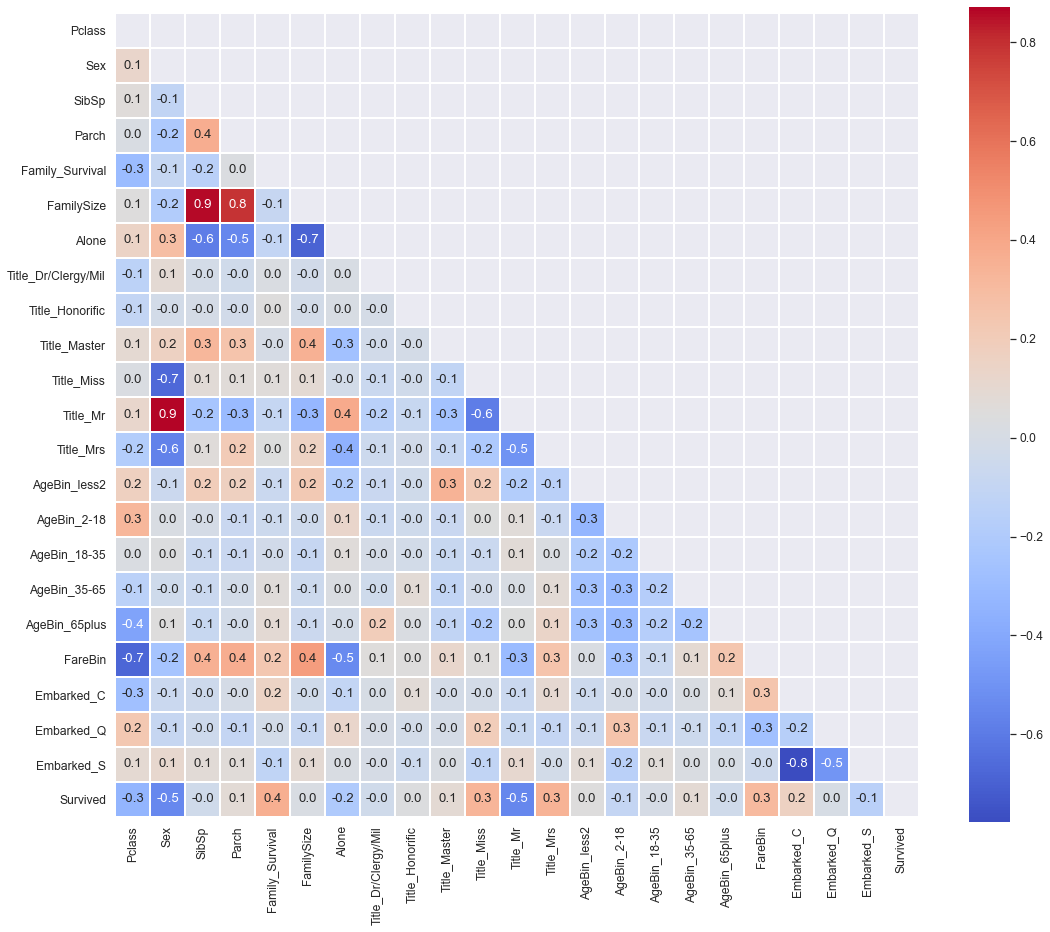

In [56]:
sns.set(font_scale=1.1)
correlation_train = v_merged.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_train,
           annot=True,
           fmt='.1f',
           cmap='coolwarm',
           square=True,
           mask=mask,
           linewidth=1)

plt.show()

### 